In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

Using: cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=128,
    shuffle=True
)

100%|██████████| 170M/170M [00:13<00:00, 12.8MB/s]


In [4]:

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1),   # 32 -> 16
            nn.ReLU(True),
            nn.Conv2d(64, 128, 4, 2, 1), # 16 -> 8
            nn.ReLU(True)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # 8 -> 16
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 3, 4, 2, 1),    # 16 -> 32
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
model = Autoencoder().to(device)

criterion = nn.MSELoss()   # Reconstruction Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:

epochs = 20

for epoch in range(epochs):
    running_loss = 0.0

    for images, _ in trainloader:
        images = images.to(device)

        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}")

Epoch [1/20], Loss: 0.0159
Epoch [2/20], Loss: 0.0031
Epoch [3/20], Loss: 0.0022
Epoch [4/20], Loss: 0.0017
Epoch [5/20], Loss: 0.0014
Epoch [6/20], Loss: 0.0013
Epoch [7/20], Loss: 0.0012
Epoch [8/20], Loss: 0.0011
Epoch [9/20], Loss: 0.0009
Epoch [10/20], Loss: 0.0009
Epoch [11/20], Loss: 0.0008
Epoch [12/20], Loss: 0.0008
Epoch [13/20], Loss: 0.0008
Epoch [14/20], Loss: 0.0007
Epoch [15/20], Loss: 0.0007
Epoch [16/20], Loss: 0.0006
Epoch [17/20], Loss: 0.0006
Epoch [18/20], Loss: 0.0006
Epoch [19/20], Loss: 0.0006
Epoch [20/20], Loss: 0.0005


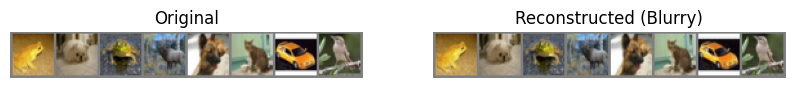

In [7]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5  # back to [0,1]
    npimg = img.cpu().detach().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.axis('off')

# Get some test images
dataiter = iter(trainloader)
images, _ = next(dataiter)
images = images.to(device)

outputs = model(images)

# Show original vs reconstructed
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
imshow(torchvision.utils.make_grid(images[:8]))
plt.title("Original")

plt.subplot(1,2,2)
imshow(torchvision.utils.make_grid(outputs[:8]))
plt.title("Reconstructed (Blurry)")

plt.show()

In [8]:
import os

save_dir = "generated_images"
os.makedirs(save_dir, exist_ok=True)


import torchvision.utils as vutils

# Take first 16 images from batch
num_images = 16

for i in range(num_images):
    vutils.save_image(
        outputs[i],
        f"{save_dir}/reconstructed_{i}.png",
        normalize=True  # converts [-1,1] -> [0,1]
    )

print("Images saved successfully.")

Images saved successfully.


In [9]:
grid = vutils.make_grid(outputs[:16], nrow=4, normalize=True)
vutils.save_image(grid, f"{save_dir}/reconstructed_grid.png")

print("Grid image saved.")


Grid image saved.


In [10]:
!zip -r generated_images.zip generated_images

  adding: generated_images/ (stored 0%)
  adding: generated_images/reconstructed_4.png (stored 0%)
  adding: generated_images/reconstructed_12.png (stored 0%)
  adding: generated_images/reconstructed_5.png (stored 0%)
  adding: generated_images/reconstructed_10.png (stored 0%)
  adding: generated_images/reconstructed_15.png (stored 0%)
  adding: generated_images/reconstructed_3.png (stored 0%)
  adding: generated_images/reconstructed_14.png (stored 0%)
  adding: generated_images/reconstructed_9.png (stored 0%)
  adding: generated_images/reconstructed_11.png (stored 0%)
  adding: generated_images/reconstructed_7.png (stored 0%)
  adding: generated_images/reconstructed_0.png (stored 0%)
  adding: generated_images/reconstructed_6.png (stored 0%)
  adding: generated_images/reconstructed_8.png (stored 0%)
  adding: generated_images/reconstructed_1.png (stored 0%)
  adding: generated_images/reconstructed_2.png (stored 0%)
  adding: generated_images/reconstructed_grid.png (deflated 0%)
  addi